In [2]:
import numpy as np
import numba 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def fractal(Re, Im, j):
    for m in range(len(Re)):
        for n in range(len(Im)):
            z = Re[m] + 1j * Im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_fractal = numba.jit(nopython=True)(fractal)

In [4]:
N = 1024
j = np.zeros((N, N), np.int64)
zRe = np.linspace(-1.5, 1.5, N)
zIm = np.linspace(-1.5, 1.5, N)

#fractal(zRe, zIm, j)
jit_fractal(zRe,zIm,j)

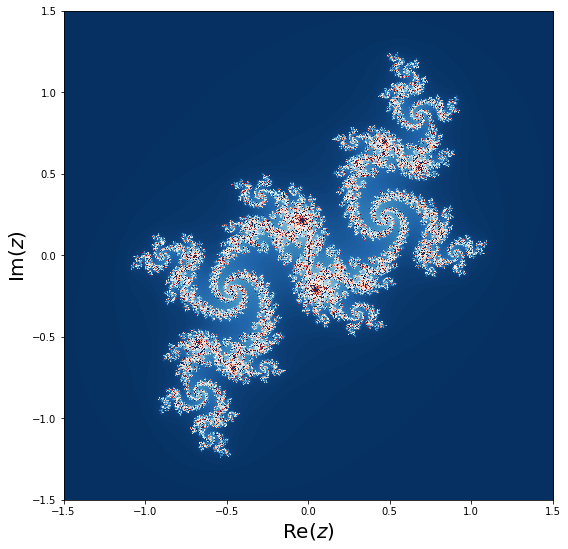

In [5]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=20)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=20)
plt.savefig("Fractal.jpg")
plt.show()

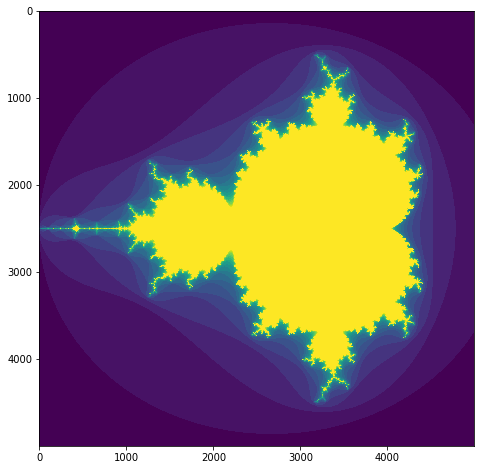

In [6]:
def mandelbrot( h,w, maxit=20 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(5000,5000))
plt.savefig("Mandelbrot.jpg")
plt.show()